# Analysis to place individual model on spatial position

## Steps: 
### 1. Computing topic word distribution.
### 2. Dissimilarity Measure using Jensen Shanon/Cosine Similarity/Euclidean Distance
### 3. Dimensionality Reduction (PCA / t-SNE / MDS)
### 4. Visualization using bokeh plot
### 5. Save position coordinates to csv



# Analysis of Topic Proportion for circle size

## Steps: 
### 1. Calculate topic proportion for each topics. 



# Analysis of similairty between pro and con models

## Steps: 
### 1. Take top n terms of topic select, sum these terms con's beta values for each topic, return max beta sum. 


# Calculate Revlevance

## Steps:
### 1. Calculate relevance according to one of the paper. 


In [73]:
import pandas as pd
import numpy as np

num_topics = 10
data_path = "~/Desktop/DataViz/whisper2/whisper/whisperVis/data/topicModeling/pro"
df = pd.read_csv(data_path + f"/{num_topics}/beta.csv")

display(df.head())
print(df.shape)

,topic,term,beta
0,1,1_hour_break,3.333175e-24
1,2,1_hour_break,3.228877e-24
2,3,1_hour_break,6.486790e-12
3,4,1_hour_break,2.023997e-12
4,5,1_hour_break,3.937727e-08


(66410, 3)


## Computing topic word distribution

In [74]:
topic_word_distr = []
imp_words = []
terms = df[df.topic == 1].term.values.tolist()

num_topics = len(df.topic.unique())
for i in range(1, num_topics+1):
    topic = df[df.topic == i] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    
print(len(topic_word_distr))
print(len(imp_words))

10
10


In [75]:
# print(topic_word_distr)
print(len(topic_word_distr[0]))

6641


# Dissimilarity Measure

In [76]:
from scipy.spatial import distance

dist = []
for i in range(num_topics): 
    t1 = topic_word_distr[i]
    d1 = []
    for j in range(num_topics):
        t2 = topic_word_distr[j]
        d = distance.jensenshannon(t1, t2)
        d1.append(d)
    dist.append(d1)

print(dist)

[[0.0, 0.0460335568329371, 0.8239785780015826, 0.8243718930161399, 0.8211542490569189, 0.8225457748989495, 0.7851704726560149, 0.82126436097393, 0.8065968339046721, 0.7845333327332118], [0.0460335568329371, 0.0, 0.8239937321342545, 0.8242772665116179, 0.8212731738765019, 0.8225717183828379, 0.7849308197066048, 0.8213019164955101, 0.8064309599207397, 0.7847485154928479], [0.8239785780015826, 0.8239937321342545, 0.0, 0.824060737580206, 0.8252000850367154, 0.81680593030572, 0.825419173454282, 0.8256744238046658, 0.8242911966073121, 0.813297188146814], [0.8243718930161399, 0.8242772665116179, 0.824060737580206, 0.0, 0.8048349275604464, 0.8236719663878131, 0.8242863663741836, 0.8186766604143078, 0.819474639460868, 0.8226448164030605], [0.8211542490569189, 0.8212731738765019, 0.8252000850367154, 0.8048349275604464, 0.0, 0.8269855744936826, 0.8201284708363028, 0.8219212236395543, 0.826349042288878, 0.8040374766410577], [0.8225457748989495, 0.8225717183828379, 0.81680593030572, 0.8236719663878

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

dist = cosine_similarity(topic_word_distr, topic_word_distr)

print(dist)

[[1.00000000e+00 9.99777701e-01 7.85150587e-04 1.11087118e-03
  2.98781882e-03 2.68854212e-03 2.02539988e-01 5.52706095e-03
  3.71759596e-02 1.29034815e-01]
 [9.99777701e-01 1.00000000e+00 7.82410844e-04 1.16353979e-03
  2.93516509e-03 2.65303231e-03 2.04261484e-01 5.53767569e-03
  3.70844242e-02 1.29134537e-01]
 [7.85150587e-04 7.82410844e-04 1.00000000e+00 1.26176202e-03
  1.21204094e-03 4.97706370e-02 9.50731858e-04 3.32612753e-04
  8.05883399e-04 9.98346182e-03]
 [1.11087118e-03 1.16353979e-03 1.26176202e-03 1.00000000e+00
  7.57933088e-03 1.88484969e-03 2.17256459e-03 1.00366968e-02
  1.00620012e-02 2.40438957e-03]
 [2.98781882e-03 2.93516509e-03 1.21204094e-03 7.57933088e-03
  1.00000000e+00 7.27004201e-04 1.02611784e-02 2.94474291e-03
  9.55901506e-04 3.07976401e-02]
 [2.68854212e-03 2.65303231e-03 4.97706370e-02 1.88484969e-03
  7.27004201e-04 1.00000000e+00 7.03209292e-04 1.39846345e-02
  7.39552233e-04 1.43374758e-02]
 [2.02539988e-01 2.04261484e-01 9.50731858e-04 2.17256459e

# Dimensionality Reduction

## TSNE

In [78]:
# Clustering
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
X_tsne = tsne.fit_transform(topic_word_distr)

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.707256
[t-SNE] KL divergence after 1000 iterations: 0.243565


## PCA

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_tsne = pca.fit_transform(dist)
# X_tsne = pca.fit_transform(topic_word_distr)

In [80]:
print(X_tsne)

[[ 1.0907237  -0.07023062]
 [ 1.09103141 -0.06951391]
 [-0.41655426 -0.49221858]
 [-0.40536807  0.11290087]
 [-0.39067667 -0.00167504]
 [-0.41527594 -0.40641046]
 [ 0.15305667  0.42763814]
 [-0.36958601  0.66966182]
 [-0.29912595  0.00272684]
 [-0.03822489 -0.17287905]]


# Visualization

In [81]:
# Generate random colors

import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colormap = np.asarray(get_colors(num_topics)) 
print(colormap)

['#9fe240' '#470d5e' '#5ef004' '#322617' '#41e92f' '#d02980' '#db2e5b'
 '#8cf5e3' '#3c40d9' '#8530eb']


In [82]:
df_cluster = pd.DataFrame()
df_cluster['X'] = X_tsne[:, 0]
df_cluster['Y'] = X_tsne[:, 1]
df_cluster['Topic'] = range(num_topics)
df_cluster['Topic_Words'] = imp_words

cluster_colors = dict()
for c in range(num_topics): 
    cluster_colors[c] = colormap[c]
    
df_cluster['Colors'] = df_cluster['Topic'].apply(lambda l: cluster_colors[l])
df_cluster.sort_values(by=['Topic'], inplace=True)

df_cluster['Topic'] = df_cluster['Topic']+1
display(df_cluster.head())

,X,Y,Topic,Topic_Words,Colors
0,1.090724,-0.070231,1,"[free, employe, discount, schedul, day, decent...",#9fe240
1,1.091031,-0.069514,2,"[free, employe, discount, schedul, day, decent...",#470d5e
2,-0.416554,-0.492219,3,"[benefit, manag, lot, worker, decent_pay, easi...",#5ef004
3,-0.405368,0.112901,4,"[pay_benefit, advanc, help, salari, worklif, c...",#322617
4,-0.390677,-0.001675,5,"[pay, hour, flexibl, cowork, balanc, cultur, f...",#41e92f


In [83]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os
# sns.scatterplot(x = "X", y="Y", hue="Topic", data=df_cluster)
# plt.xlabel("PCA1")
# plt.ylabel("PCA2")
# plt.title("PCA Visualization of topics")
# plt.savefig(os.path.expanduser("~/Desktop/img/PCApro.png"))
# plt.show()

In [84]:
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.io import export_png
output_notebook()

Loading BokehJS ...

In [85]:
source = ColumnDataSource(dict(
    x=df_cluster['X'],
    y=df_cluster['Y'],
    color=df_cluster['Colors'],
    label=df_cluster['Topic'],
    topic_words = df_cluster["Topic_Words"]
))

In [86]:
title = 'PCA visualization of topics (pro)'

plot_lda = figure(plot_width=1000, plot_height=700,
                     title=title, tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1, 
                     x_axis_label = "PCA1", y_axis_label = "PCA2")

plot_lda.scatter(x='x', y='y',  legend='label', source=source,
                 color='color', alpha=0.8)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = { "Topic": "@label  <br> Topic_words: @topic_words "}
plot_lda.legend.location = "top_left"

# export_png(plot_lda, filename=os.path.expanduser("~/Desktop/img/PCAcon.png"))
show(plot_lda)

# Saving File

In [87]:
display(df_cluster.head())
display(df_cluster.shape)

,X,Y,Topic,Topic_Words,Colors
0,1.090724,-0.070231,1,"[free, employe, discount, schedul, day, decent...",#9fe240
1,1.091031,-0.069514,2,"[free, employe, discount, schedul, day, decent...",#470d5e
2,-0.416554,-0.492219,3,"[benefit, manag, lot, worker, decent_pay, easi...",#5ef004
3,-0.405368,0.112901,4,"[pay_benefit, advanc, help, salari, worklif, c...",#322617
4,-0.390677,-0.001675,5,"[pay, hour, flexibl, cowork, balanc, cultur, f...",#41e92f


(10, 5)

In [60]:
import os
df_cluster.to_csv(os.path.expanduser(data_path + f"/{num_topics}/topic_center.csv"))

# Topic Proportion

In [88]:
df = pd.read_csv(data_path + f"/{num_topics}/gamma.csv")

display(df.head())
print(df.shape)

,document,topic,gamma
0,1,1,0.060023
1,2,1,0.051964
2,3,1,0.129970
3,4,1,0.043025
4,5,1,0.124641


(336200, 3)


In [89]:
lst = []
for t in range(1, num_topics+1): 
    df_topic = df[df.topic == t]
    lst.append(df_topic.gamma.sum())

tot = sum(lst)
lst = np.array([round(i/tot, 4) for i in lst])

df_cluster["Topic_Proportion"] = lst
display(df_cluster.head())

,X,Y,Topic,Topic_Words,Colors,Topic_Proportion
0,1.090724,-0.070231,1,"[free, employe, discount, schedul, day, decent...",#9fe240,0.0688
1,1.091031,-0.069514,2,"[free, employe, discount, schedul, day, decent...",#470d5e,0.0710
2,-0.416554,-0.492219,3,"[benefit, manag, lot, worker, decent_pay, easi...",#5ef004,0.1165
3,-0.405368,0.112901,4,"[pay_benefit, advanc, help, salari, worklif, c...",#322617,0.1013
4,-0.390677,-0.001675,5,"[pay, hour, flexibl, cowork, balanc, cultur, f...",#41e92f,0.1133


In [63]:
df_cluster.Topic_Proportion.sum()

0.9997999999999999

In [64]:
df_cluster.to_csv(data_path + f"/{num_topics}/topic_center.csv")

# Topic Term Distribution

In [65]:
df = pd.read_csv(data_path + f"/{num_topics}/beta.csv")
display(df.head())
tot_term = df[df.topic == 1]['term'].count()
print(tot_term)

,topic,term,beta
0,1,’_care,5.945098e-06
1,2,’_care,1.450088e-04
2,3,’_care,1.043809e-179
3,4,’_care,5.369622e-139
4,5,’_care,2.697325e-156


6420


In [66]:
terms = df[df.topic == 1]["term"].values.tolist()
lst = []
i = 1
for t in terms: 
    term_prob = df[df.term == t]['beta'].sum()/num_topics
    lst.append([i, t, term_prob])
    i = i+1
df_term = pd.DataFrame(lst, columns=['Term_Id', 'Term', 'Term_Prob'])
display(df_term.head())
display(df_term.shape)

,Term_Id,Term,Term_Prob
0,1,’_care,0.000013
1,2,’_re,0.000031
2,3,1_hour_lunch,0.000028
3,4,1_minut_late,0.000007
4,5,1_short_break,0.000010


(6420, 3)

In [67]:
df_term.sort_values(by="Term_Prob", ascending=False)[:5]

,Term_Id,Term,Term_Prob
3389,3390,manag,0.030139
5832,5833,time,0.020220
2516,2517,hour,0.018856
4374,4375,poor,0.017756
4135,4136,pay,0.016926


In [68]:
for t in terms: 
    term_prob = df_term.loc[df_term.Term == t, "Term_Prob"].iloc[0]
    df.loc[df.term == t, "Term_Prob"] = term_prob
    
df["Term_Freq"] = df.Term_Prob * tot_term

In [69]:
display(df.head())

,topic,term,beta,Term_Prob,Term_Freq
0,1,’_care,5.945098e-06,0.000013,0.08076
1,2,’_care,1.450088e-04,0.000013,0.08076
2,3,’_care,1.043809e-179,0.000013,0.08076
3,4,’_care,5.369622e-139,0.000013,0.08076
4,5,’_care,2.697325e-156,0.000013,0.08076


In [70]:
df.sort_values(by="Term_Freq", ascending=False)[:15]

,topic,term,beta,Term_Prob,Term_Freq
40674,7,manag,1.941805e-76,0.030139,193.495038
40679,12,manag,2.181817e-69,0.030139,193.495038
40676,9,manag,4.846030e-54,0.030139,193.495038
40675,8,manag,1.646533e-85,0.030139,193.495038
40673,6,manag,5.933599e-60,0.030139,193.495038
40672,5,manag,3.616730e-01,0.030139,193.495038
40671,4,manag,2.099688e-60,0.030139,193.495038
40670,3,manag,1.250620e-34,0.030139,193.495038
40669,2,manag,2.042424e-45,0.030139,193.495038
40678,11,manag,1.910633e-22,0.030139,193.495038


In [71]:
df.rename(columns={"topic": "Topic", "term": "Term", "beta": "Beta"}, inplace=True)
display(df.head())

,Topic,Term,Beta,Term_Prob,Term_Freq
0,1,’_care,5.945098e-06,0.000013,0.08076
1,2,’_care,1.450088e-04,0.000013,0.08076
2,3,’_care,1.043809e-179,0.000013,0.08076
3,4,’_care,5.369622e-139,0.000013,0.08076
4,5,’_care,2.697325e-156,0.000013,0.08076


# Save File

In [72]:
df.to_csv(data_path + f"/{num_topics}/topic_term_distr.csv")

# How to calculate relevance?

In [37]:
df_relevance = df.copy()

In [38]:
lam = 1
df_relevance["Relevance"] = lam*df_relevance.Beta + (1-lam)*df_relevance.Beta/df_relevance.Term_Prob
display(df_relevance.head())

,Topic,Term,Beta,Term_Prob,Term_Freq,Relevance
0,1,1_hour_break,3.333175e-24,0.000008,0.051773,3.333175e-24
1,2,1_hour_break,3.228877e-24,0.000008,0.051773,3.228877e-24
2,3,1_hour_break,6.486790e-12,0.000008,0.051773,6.486790e-12
3,4,1_hour_break,2.023997e-12,0.000008,0.051773,2.023997e-12
4,5,1_hour_break,3.937727e-08,0.000008,0.051773,3.937727e-08


In [42]:
df5 = df_relevance[df_relevance.Topic == 5]
relevant_term = df5.sort_values(by="Relevance", ascending=False)[:10]

In [43]:
print(relevant_term)

       Topic             Term      Beta  Term_Prob   Term_Freq  Relevance
46554      5              pay  0.229724   0.022973  152.564394   0.229724
33684      5             hour  0.107637   0.011446   76.010955   0.107637
24954      5          flexibl  0.083757   0.008376   55.622796   0.083757
14874      5           cowork  0.063759   0.006376   42.342786   0.063759
3204       5           balanc  0.042327   0.004688   31.134391   0.042327
15524      5           cultur  0.034195   0.003422   22.723097   0.034195
25324      5  flexibl_schedul  0.027384   0.002741   18.202901   0.027384
35334      5            insur  0.027303   0.003203   21.274015   0.027303
45614      5             paid  0.020978   0.006647   44.140357   0.020978
24004      5           famili  0.016579   0.001697   11.266823   0.016579


In [26]:
relevant_term.sort_values(by="Term_Freq", ascending=False, inplace=True)

In [27]:
relevant_term["Term_Freq"] = np.round(relevant_term["Term_Freq"])

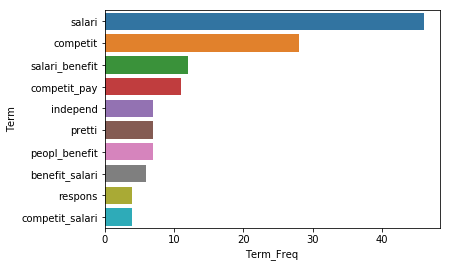

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Term_Freq", y="Term", data=relevant_term)
plt.show()

# Pro Con Similarity

In [1]:
import pandas as pd
import numpy as np

# num_topics_pro = 8
num_topics_pro = 26
df_pro = pd.read_csv(f"~/Desktop/R_js/data/beta/pro{num_topics_pro}_beta.csv")

# num_topics_con = 10
num_topics_con = 24
df_con = pd.read_csv(f"~/Desktop/R_js/data/beta/con{num_topics_con}_beta.csv")

display(df_pro.head())
display(df_pro.shape)

display(df_con.head())
display(df_con.shape)

,topic,term,beta
0,1,1_hour_break,3.672673e-208
1,2,1_hour_break,1.351000e-189
2,3,1_hour_break,8.675901e-213
3,4,1_hour_break,4.690151e-197
4,5,1_hour_break,6.897081e-192


(172666, 3)

,topic,term,beta
0,1,’_care,8.624717e-100
1,2,’_care,2.555270e-93
2,3,’_care,1.219269e-114
3,4,’_care,3.194975e-91
4,5,’_care,7.375773e-119


(154080, 3)

In [2]:
pro_terms = df_pro[df_pro.topic == 1]["term"].values.tolist()
con_terms = df_con[df_con.topic == 1]["term"].values.tolist()

pro_con = list(set(pro_terms) & set(con_terms))
print(len(pro_con))
print(pro_con)

2096
['talk_peopl', 'hour_employe', 'leisur', 'insur_employe', 'heath', 'one', 'holiday_season', 'situat', 'properli', 'field', 'releas', 'grow', 'life', 'district', 'trust', 'commiss_base', 'store', 'cost_studi', 'promot_opportun', 'unload', 'workplac_cultur', 'adult', 'afford', 'execut', 'comput_system', 'station', 'true', 'paycheck', 'ship', 'establish', 'accept', 'team_support', 'plu', 'technic', 'recruit', 'implement', 'stuff', 'girl', 'talk', 'associ', 'forgiv', 'custom_satisfact', 'quarterli', 'fifteen', 'vacat_sick_day', 'resourc', 'certif', 'pharmaci_manag', 'quiet', 'fargo', 'later', 'mortgag', 'solid', 'common', 'slight', 'desk', 'repeat', 'benefit_retir', 'divis', 'half_hour_lunch', 'structur', 'cheaper', 'horribl', 'packag', 'free_coffe', 'hour_team', 'corpor_environ', 'opinion', 'occassion', 'person_vehicl', 'cut', 'cost_live', 'recommend', 'hire', 'appreci', 'pay_health', 'basi', 'compress', 'agent', 'manag_care_employe', 'american', 'schedul_worklif', 'assist', 'strong'

In [3]:
df_pro1 = df_pro.loc[df_pro['term'].isin(pro_con)]
df_con1 = df_con.loc[df_con['term'].isin(pro_con)]

In [8]:
df_pro1.head()

,topic,term,beta
26,1,1_hour_lunch,6.593800e-160
27,2,1_hour_lunch,4.077190e-131
28,3,1_hour_lunch,6.856420e-180
29,4,1_hour_lunch,1.592407e-158
30,5,1_hour_lunch,4.106505e-165


In [9]:
df_pro1.shape

(54496, 3)